# Model Robustness

**Objectives**
- Load the Model(s)
- Run predictions on the model using the Holdout/Test Datasplit (better if the malicious samples are verified for malware types)
- Record instances where the model failed to predict correctly
- Record the performance of the models (e.g., Accuracy, Precision, Recall, ROC-AUC, etc.)

In [1]:
import pandas as pd
import numpy as np

import lightgbm as lgbm
import catboost as catb

from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, average_precision_score, roc_auc_score, recall_score, precision_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, RocCurveDisplay

from joblib import load
import warnings
warnings.filterwarnings("ignore")

## 1. Determine the Model Performance in each of the GBDT Models and each of its two behavior-types.

`How does the model perform using 'real-world' data (i.e., Test/Holdout Split)?`

Run other metrics as well as you see fit that are not found in the classification_report and Confusion Matrix.

- Label column is `0/'malicious'`
- Feature column is `[:, 1:101]`

### 1.1 Defining a helper function for evaluation


In [2]:
def evaluate(model, test_set, y_actual):
    y_pred = model.predict(test_set)
    cm = confusion_matrix(y_actual, y_pred)
    print(classification_report(y_actual, y_pred, digits=4))
    print(f"AUC-ROC Score: {roc_auc_score(y_actual, y_pred):.4f}")
    print("ROC Curve & Confusion matrix:")
    RocCurveDisplay.from_predictions(y_actual, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    #print(classification_report(y_actual, y_pred, digits=4))
    

### 1.2 LightGBM

In [3]:
DF_LGBM_TB = pd.read_csv('../Dataset/TB/LGBM_TB_Test.csv', low_memory=False) #<== Point these to the proper Test/Holdout datasets.
DF_LGBM_IB = pd.read_csv('../Dataset/IB/LGBM_IB_Test.csv', low_memory=False)

display(DF_LGBM_TB.head())
print(DF_LGBM_TB['type'].unique())
display(DF_LGBM_IB.head())
print(DF_LGBM_IB['type'].unique())

,malware,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,...,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99,hash,type
0,1,240,117,240,117,240,117,240,117,240,...,240,117,240,117,172,60,225,35,0fe987c56cfb02db5d810534d6098d93,trojan
1,1,82,198,86,82,274,37,240,117,260,...,274,215,274,158,215,37,158,215,f58d31adac5b879b50ce07a9da086736,trojan
2,1,215,208,228,117,228,240,117,228,159,...,230,35,240,117,208,89,225,35,f07d9fa9d2852bd4b7b36f39dd531b4a,pua
3,1,159,208,260,141,65,208,20,34,215,...,187,135,171,262,208,262,187,262,7a493fa07f0f7d0c9e372eedae03036b,ransomware
4,1,82,240,117,240,117,240,117,240,117,...,260,141,260,141,260,141,260,141,ba60236d9f9fe6cd0a10ffbbf2296669,trojan


['trojan' 'pua' 'ransomware' 'downloader' 'dropper' 'benign' 'adware'
 'hacktool' 'spyware' 'miner' 'virus']


,malware,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,...,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99,hash,type
0,1,240,117,228,215,274,158,172,198,208,...,307,307,307,307,307,307,307,307,0fe987c56cfb02db5d810534d6098d93,trojan
1,1,82,198,86,274,37,240,117,260,40,...,307,307,307,307,307,307,307,307,f58d31adac5b879b50ce07a9da086736,trojan
2,1,215,208,228,117,240,159,187,260,141,...,307,307,307,307,307,307,307,307,f07d9fa9d2852bd4b7b36f39dd531b4a,pua
3,1,159,208,260,141,65,20,34,215,172,...,307,307,307,307,307,307,307,307,7a493fa07f0f7d0c9e372eedae03036b,ransomware
4,1,82,240,117,172,16,11,274,158,215,...,307,307,307,307,307,307,307,307,ba60236d9f9fe6cd0a10ffbbf2296669,trojan


['trojan' 'pua' 'ransomware' 'downloader' 'dropper' 'benign' 'adware'
 'hacktool' 'spyware' 'miner' 'virus']


In [4]:
# Load trained LightGBM model files
default_tb = load('../GBDT_Training/Outputs/LGBM/Default/RYZEN3b_LGBM_TB.model') # <== Point these to the respective .model files
default_ib = load('../GBDT_Training/Outputs/LGBM/Default/RYZEN3b_LGBM_IB.model')
tuned_tb = load('../GBDT_Training/Outputs/LGBM/Tuned/TUNED_RYZEN3b_LGBM_TB.model')
tuned_ib = load('../GBDT_Training/Outputs/LGBM/Tuned/TUNED_RYZEN3b_LGBM_IB.model')

1. Default LGBM TB

              precision    recall  f1-score   support

           0     0.9315    0.6018    0.7312       113
           1     0.9889    0.9988    0.9938      4011

    accuracy                         0.9879      4124
   macro avg     0.9602    0.8003    0.8625      4124
weighted avg     0.9873    0.9879    0.9866      4124

AUC-ROC Score: 0.8003
ROC Curve & Confusion matrix:


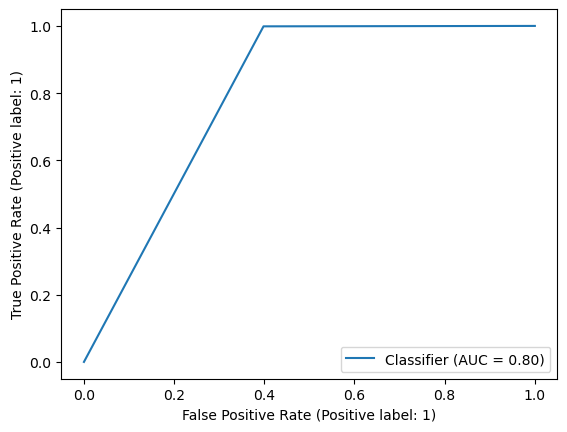

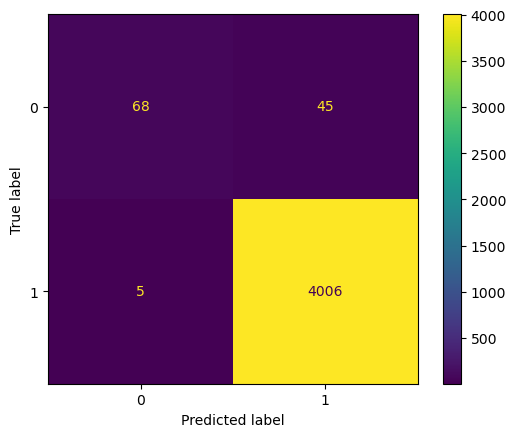

In [5]:
print("1. Default LGBM TB\n")
evaluate(default_tb, DF_LGBM_TB.iloc[:,1:101], DF_LGBM_TB.iloc[:,0])

2. Default LGBM IB

              precision    recall  f1-score   support

           0     0.9487    0.6549    0.7749       113
           1     0.9904    0.9990    0.9947      4011

    accuracy                         0.9896      4124
   macro avg     0.9695    0.8269    0.8848      4124
weighted avg     0.9892    0.9896    0.9886      4124

AUC-ROC Score: 0.8269
ROC Curve & Confusion matrix:


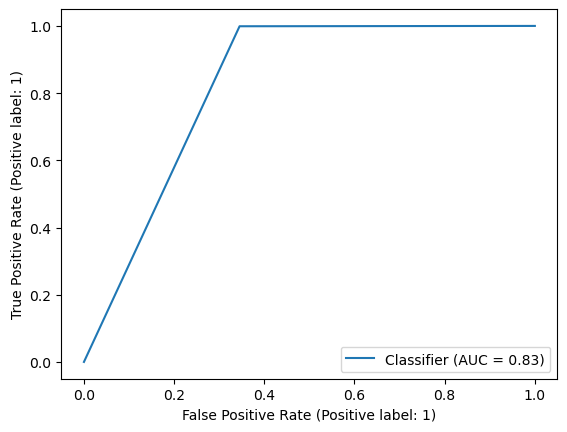

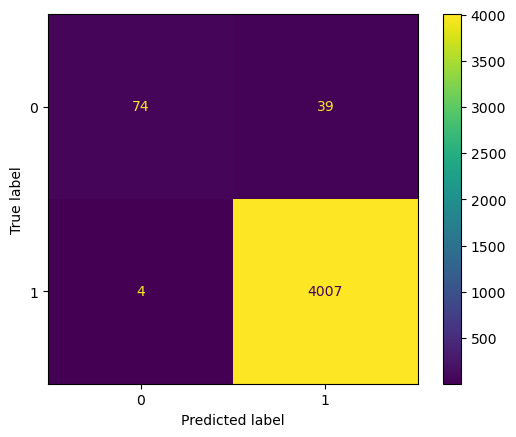

In [6]:
print("2. Default LGBM IB\n")
evaluate(default_ib, DF_LGBM_IB.iloc[:,1:101], DF_LGBM_IB.iloc[:,0])

3. Tuned LGBM TB

              precision    recall  f1-score   support

           0     0.9583    0.6106    0.7459       113
           1     0.9891    0.9993    0.9942      4011

    accuracy                         0.9886      4124
   macro avg     0.9737    0.8049    0.8701      4124
weighted avg     0.9883    0.9886    0.9874      4124

AUC-ROC Score: 0.8049
ROC Curve & Confusion matrix:


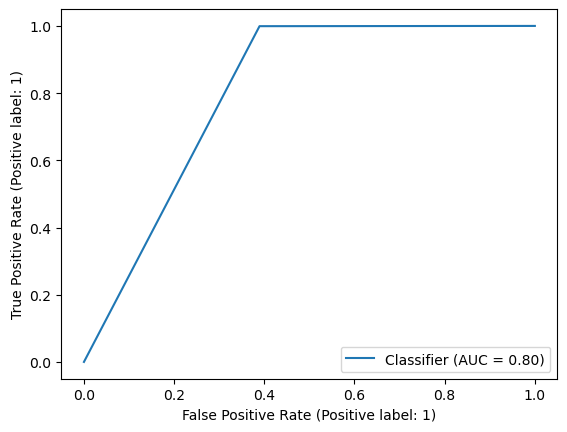

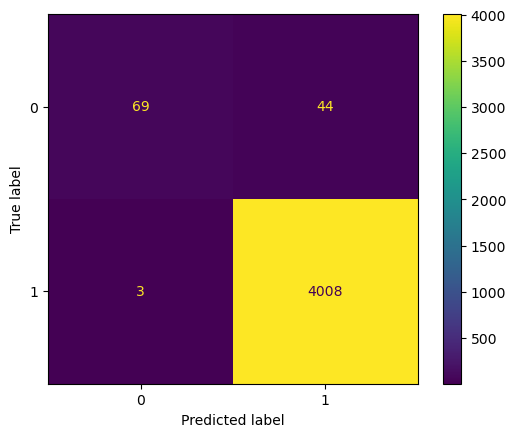

In [7]:
print("3. Tuned LGBM TB\n")
evaluate(tuned_tb, DF_LGBM_TB.iloc[:,1:101], DF_LGBM_TB.iloc[:,0])

4. Tuned LGBM IB

              precision    recall  f1-score   support

           0     0.9634    0.6991    0.8103       113
           1     0.9916    0.9993    0.9954      4011

    accuracy                         0.9910      4124
   macro avg     0.9775    0.8492    0.9028      4124
weighted avg     0.9908    0.9910    0.9903      4124

AUC-ROC Score: 0.8492
ROC Curve & Confusion matrix:


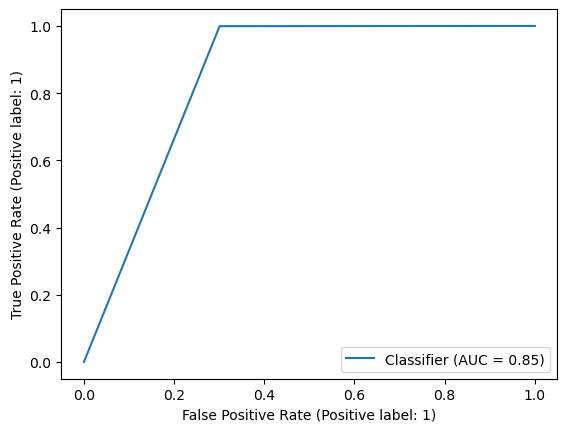

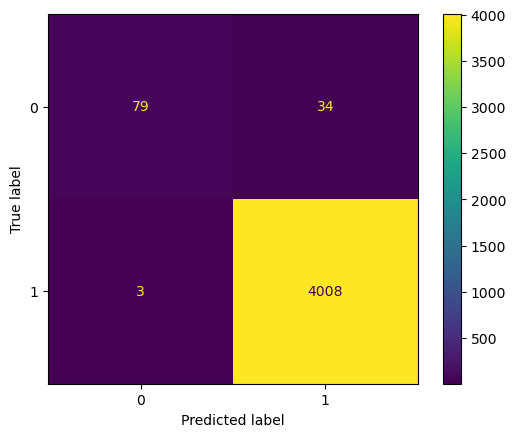

In [8]:
print("4. Tuned LGBM IB\n")
evaluate(tuned_ib, DF_LGBM_IB.iloc[:,1:101], DF_LGBM_IB.iloc[:,0])

### 1.3 CatBoost

In [9]:
DF_CATB_TB = pd.read_csv('../Dataset/TB/CATB_TB_Test.csv', low_memory=False) #<== Point these to the proper Test/Holdout datasets.
DF_CATB_IB = pd.read_csv('../Dataset/IB/CATB_IB_Test.csv', low_memory=False)

DF_CATB_IB.iloc[:,1:101] = DF_CATB_IB.iloc[:,1:101].astype('str')
DF_CATB_IB.replace("nan", "NaN", inplace=True)

#DF_CATB_TB = DF_CATB_TB[DF_CATB_TB['Type 1'] != '_']
#DF_CATB_IB = DF_CATB_IB[DF_CATB_IB['Type 1'] != '_']

display(DF_CATB_TB.head())
print(DF_CATB_TB['type'].unique())
display(DF_CATB_IB.head())
print(DF_CATB_IB['type'].unique())

,malware,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,...,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99,hash,type
0,1,LdrLoadDll,LdrGetProcedureAddress,LdrLoadDll,LdrGetProcedureAddress,LdrLoadDll,LdrGetProcedureAddress,LdrLoadDll,LdrGetProcedureAddress,LdrLoadDll,...,LdrLoadDll,LdrGetProcedureAddress,LdrLoadDll,LdrGetProcedureAddress,LdrGetDllHandle,FindResourceExW,DrawTextExW,GetSystemMetrics,0fe987c56cfb02db5d810534d6098d93,trojan
1,1,GetSystemTimeAsFileTime,GetSystemInfo,NtCreateMutant,GetSystemTimeAsFileTime,NtOpenKey,NtOpenKeyEx,LdrLoadDll,LdrGetProcedureAddress,RegOpenKeyExW,...,NtOpenKey,NtClose,NtOpenKey,NtQueryValueKey,NtClose,NtOpenKeyEx,NtQueryValueKey,NtClose,f58d31adac5b879b50ce07a9da086736,trojan
2,1,NtClose,NtAllocateVirtualMemory,NtProtectVirtualMemory,LdrGetProcedureAddress,NtProtectVirtualMemory,LdrLoadDll,LdrGetProcedureAddress,NtProtectVirtualMemory,NtDelayExecution,...,GetUserNameW,GetSystemMetrics,LdrLoadDll,LdrGetProcedureAddress,NtAllocateVirtualMemory,NtDuplicateObject,DrawTextExW,GetSystemMetrics,f07d9fa9d2852bd4b7b36f39dd531b4a,pua
3,1,NtDelayExecution,NtAllocateVirtualMemory,RegOpenKeyExW,RegQueryValueExW,RegCloseKey,NtAllocateVirtualMemory,NtOpenFile,NtQueryInformationFile,NtClose,...,NtFreeVirtualMemory,NtCreateSection,NtMapViewOfSection,NtQuerySystemInformation,NtAllocateVirtualMemory,NtQuerySystemInformation,NtFreeVirtualMemory,NtQuerySystemInformation,7a493fa07f0f7d0c9e372eedae03036b,ransomware
4,1,GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProcedureAddress,LdrLoadDll,LdrGetProcedureAddress,LdrLoadDll,LdrGetProcedureAddress,LdrLoadDll,LdrGetProcedureAddress,...,RegOpenKeyExW,RegQueryValueExW,RegOpenKeyExW,RegQueryValueExW,RegOpenKeyExW,RegQueryValueExW,RegOpenKeyExW,RegQueryValueExW,ba60236d9f9fe6cd0a10ffbbf2296669,trojan


['trojan' 'pua' 'ransomware' 'downloader' 'dropper' 'benign' 'adware'
 'hacktool' 'spyware' 'miner' 'virus']


,malware,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,...,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99,hash,type
0,1,LdrLoadDll,LdrGetProcedureAddress,NtProtectVirtualMemory,NtClose,NtOpenKey,NtQueryValueKey,LdrGetDllHandle,GetSystemInfo,NtAllocateVirtualMemory,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0fe987c56cfb02db5d810534d6098d93,trojan
1,1,GetSystemTimeAsFileTime,GetSystemInfo,NtCreateMutant,NtOpenKey,NtOpenKeyEx,LdrLoadDll,LdrGetProcedureAddress,RegOpenKeyExW,RegQueryInfoKeyW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f58d31adac5b879b50ce07a9da086736,trojan
2,1,NtClose,NtAllocateVirtualMemory,NtProtectVirtualMemory,LdrGetProcedureAddress,LdrLoadDll,NtDelayExecution,NtFreeVirtualMemory,RegOpenKeyExW,RegQueryValueExW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f07d9fa9d2852bd4b7b36f39dd531b4a,pua
3,1,NtDelayExecution,NtAllocateVirtualMemory,RegOpenKeyExW,RegQueryValueExW,RegCloseKey,NtOpenFile,NtQueryInformationFile,NtClose,LdrGetDllHandle,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7a493fa07f0f7d0c9e372eedae03036b,ransomware
4,1,GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProcedureAddress,LdrGetDllHandle,SetUnhandledExceptionFilter,CryptAcquireContextW,NtOpenKey,NtQueryValueKey,NtClose,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ba60236d9f9fe6cd0a10ffbbf2296669,trojan


['trojan' 'pua' 'ransomware' 'downloader' 'dropper' 'benign' 'adware'
 'hacktool' 'spyware' 'miner' 'virus']


In [10]:
# Load trained CatBoost model files (CatBoost requires instantiation before being able to load a trianed model file).
default_tb = catb.CatBoostClassifier()
default_ib = catb.CatBoostClassifier()
tuned_tb = catb.CatBoostClassifier()
tuned_ib = catb.CatBoostClassifier()
default_tb = default_tb.load_model("../GBDT_Training/Outputs/CATB/Default/RYZEN3b_CATB_TB.model", format='json') # <== Point these to the respective .model files
default_ib = default_ib.load_model("../GBDT_Training/Outputs/CATB/Default/RYZEN3b_CATB_IB.model", format='json')
tuned_tb = tuned_tb.load_model("../GBDT_Training/Outputs/CATB/Tuned/TUNED_RYZEN3b_CATB_TB.model", format='json')
tuned_ib = tuned_ib.load_model("../GBDT_Training/Outputs/CATB/Tuned/TUNED_RYZEN3b_CATB_IB.model", format='json')

1. Default CatBoost TB

              precision    recall  f1-score   support

           0     0.9383    0.6726    0.7835       113
           1     0.9908    0.9988    0.9948      4011

    accuracy                         0.9898      4124
   macro avg     0.9646    0.8357    0.8891      4124
weighted avg     0.9894    0.9898    0.9890      4124

AUC-ROC Score: 0.8357
ROC Curve & Confusion matrix:


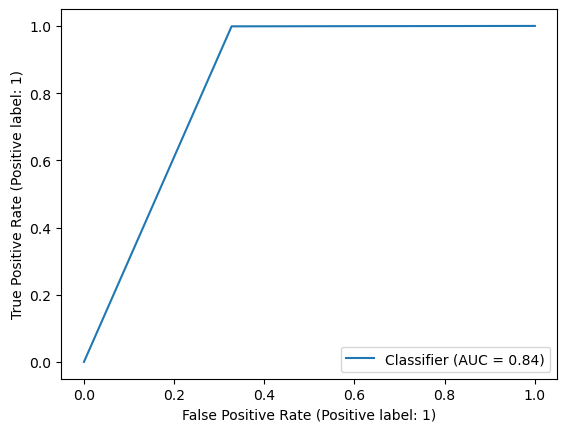

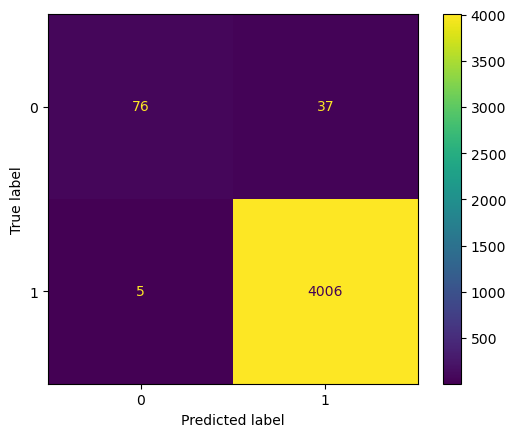

In [11]:
print("1. Default CatBoost TB\n")
evaluate(default_tb, DF_CATB_TB.iloc[:,1:101], DF_CATB_TB.iloc[:,0])

2. Default CatBoost IB

              precision    recall  f1-score   support

           0     0.9398    0.6903    0.7959       113
           1     0.9913    0.9988    0.9950      4011

    accuracy                         0.9903      4124
   macro avg     0.9655    0.8445    0.8955      4124
weighted avg     0.9899    0.9903    0.9896      4124

AUC-ROC Score: 0.8445
ROC Curve & Confusion matrix:


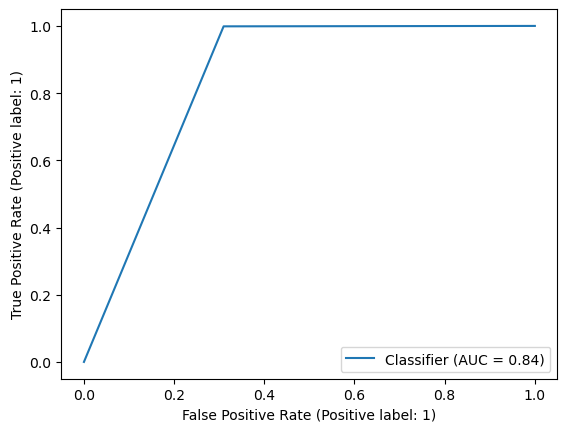

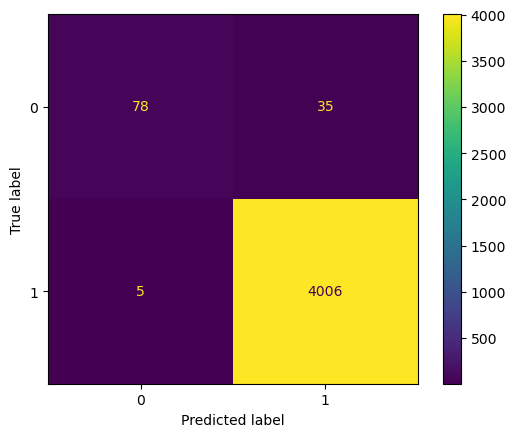

In [12]:
print("2. Default CatBoost IB\n")
evaluate(default_ib, DF_CATB_IB.iloc[:,1:101], DF_CATB_IB.iloc[:,0])

3. Tuned CatBoost TB

              precision    recall  f1-score   support

           0     0.9059    0.6814    0.7778       113
           1     0.9911    0.9980    0.9945      4011

    accuracy                         0.9893      4124
   macro avg     0.9485    0.8397    0.8862      4124
weighted avg     0.9888    0.9893    0.9886      4124

AUC-ROC Score: 0.8397
ROC Curve & Confusion matrix:


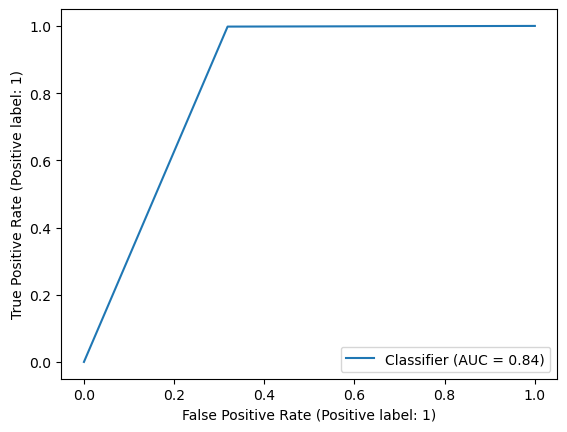

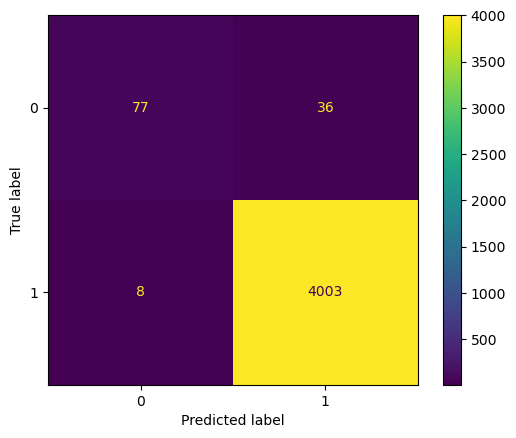

In [13]:
print("3. Tuned CatBoost TB\n")
evaluate(tuned_tb, DF_CATB_TB.iloc[:,1:101], DF_CATB_TB.iloc[:,0])

4. Tuned CatBoost IB

              precision    recall  f1-score   support

           0     0.9101    0.7168    0.8020       113
           1     0.9921    0.9980    0.9950      4011

    accuracy                         0.9903      4124
   macro avg     0.9511    0.8574    0.8985      4124
weighted avg     0.9898    0.9903    0.9897      4124

AUC-ROC Score: 0.8574
ROC Curve & Confusion matrix:


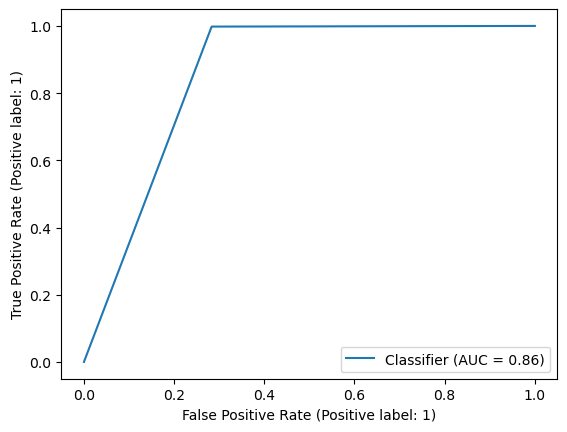

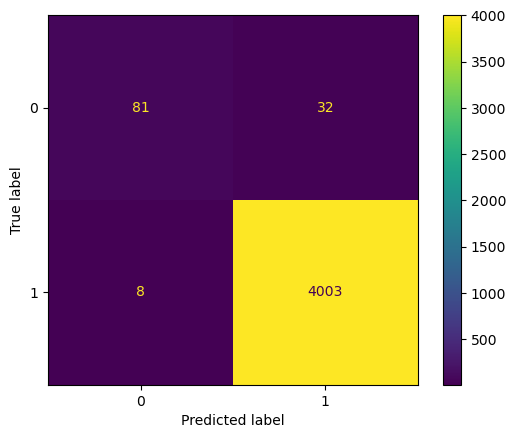

In [14]:
print("4. Tuned CatBoost IB\n")
evaluate(tuned_ib, DF_CATB_IB.iloc[:,1:101], DF_CATB_IB.iloc[:,0])

## 2. Check for model capabilities at a malware type level in each GBDT Models and each of its two behavior-types.

Using the `xx` dataset, determine the prediction capability of the model in each malware type.

**Answer this question:**

`How good are the model (as per classification report and confusion matrix) on a per-malware type basis?`

The theory is that malware-types that are prominent in terms of quantity might be detected accurately as malware than those that are not. 

### 2.1 Defining a helper function

In [15]:
def evaluate_per_type(model, test_set, mal_type):
    filtered_set = test_set.loc[(test_set['type'] == 'benign') | (test_set['type'] == mal_type)]
    y_pred = model.predict(filtered_set.iloc[:,1:101])
    acc = accuracy_score(filtered_set.iloc[:,0], y_pred)
    prec = precision_score(filtered_set.iloc[:,0], y_pred)
    rec = recall_score(filtered_set.iloc[:,0], y_pred)
    auc_roc = roc_auc_score(filtered_set.iloc[:,0], y_pred)
    f1 = f1_score(filtered_set.iloc[:,0], y_pred)
    cm = confusion_matrix(filtered_set.iloc[:,0], y_pred)
    print("Malware Type: " + mal_type)
    print("==========================")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print(f"AUC-ROC:   {auc_roc:.4f}")
    print(f"TN: {cm[0,0]:4d} FN: {cm[1,0]:4d}")
    print(f"TP: {cm[1,1]:4d} FP: {cm[0,1]:4d}")
    print("")

### 2.1 LightGBM

In [16]:
#Load Verified Test/Holodut Dataset
DF_LGBM_TB = pd.read_csv('../Dataset/TB/LGBM_TB_Test.csv', low_memory=False)
DF_LGBM_IB = pd.read_csv('../Dataset/IB/LGBM_IB_Test.csv', low_memory=False)

# No need to drop these "_" muna, assume na walang false-labelled malicious samples (pa-comment out nalang muna).
# DF_LGBM_TB = DF_LGBM_TB[DF_LGBM_TB['type'] != '_']
# DF_LGBM_IB = DF_LGBM_IB[DF_LGBM_IB['type'] != '_']
DF_LGBM_TB = DF_LGBM_TB.dropna()
DF_LGBM_IB = DF_LGBM_IB.dropna()

#Models
default_tb = load('../GBDT_Training/Outputs/LGBM/Default/RYZEN3b_LGBM_TB.model') # <== Point these to the respective .model files
default_ib = load('../GBDT_Training/Outputs/LGBM/Default/RYZEN3b_LGBM_IB.model')
tuned_tb = load('../GBDT_Training/Outputs/LGBM/Tuned/TUNED_RYZEN3b_LGBM_TB.model')
tuned_ib = load('../GBDT_Training/Outputs/LGBM/Tuned/TUNED_RYZEN3b_LGBM_IB.model')

display(DF_LGBM_TB)
print("DF_LGBM_TB:", DF_LGBM_TB['type'].unique().tolist())
display(DF_LGBM_IB)
print("DF_LGBM_IB:", DF_LGBM_IB['type'].unique().tolist())

'''
COLUMNS:
Features = [:, 1:101]
Label = [:, 0]
Hash = [:, 101]
Type 1 (malware type) = [:, 102]
'''

,malware,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,...,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99,hash,type
0,1,240,117,240,117,240,117,240,117,240,...,240,117,240,117,172,60,225,35,0fe987c56cfb02db5d810534d6098d93,trojan
1,1,82,198,86,82,274,37,240,117,260,...,274,215,274,158,215,37,158,215,f58d31adac5b879b50ce07a9da086736,trojan
2,1,215,208,228,117,228,240,117,228,159,...,230,35,240,117,208,89,225,35,f07d9fa9d2852bd4b7b36f39dd531b4a,pua
3,1,159,208,260,141,65,208,20,34,215,...,187,135,171,262,208,262,187,262,7a493fa07f0f7d0c9e372eedae03036b,ransomware
4,1,82,240,117,240,117,240,117,240,117,...,260,141,260,141,260,141,260,141,ba60236d9f9fe6cd0a10ffbbf2296669,trojan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4119,1,208,228,240,117,240,117,82,240,117,...,208,172,117,187,208,187,172,117,b2e6e058b25a25175f4f2d264f0bb83c,trojan
4120,1,82,208,172,117,172,208,16,110,172,...,279,208,82,112,123,65,208,112,e768ea96da507ed239ce925c24b8fd1a,trojan
4121,1,82,240,117,240,117,93,117,16,147,...,230,240,117,225,35,208,89,225,5a99618b63178d7a221552fe962992e3,trojan
4122,1,112,274,158,215,274,158,215,298,76,...,297,135,171,215,35,208,56,71,10a935e723a4b1cc416adb7af2bc4965,trojan


DF_LGBM_TB: ['trojan', 'pua', 'ransomware', 'downloader', 'dropper', 'benign', 'adware', 'hacktool', 'spyware', 'miner', 'virus']


,malware,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,...,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99,hash,type
0,1,240,117,228,215,274,158,172,198,208,...,307,307,307,307,307,307,307,307,0fe987c56cfb02db5d810534d6098d93,trojan
1,1,82,198,86,274,37,240,117,260,40,...,307,307,307,307,307,307,307,307,f58d31adac5b879b50ce07a9da086736,trojan
2,1,215,208,228,117,240,159,187,260,141,...,307,307,307,307,307,307,307,307,f07d9fa9d2852bd4b7b36f39dd531b4a,pua
3,1,159,208,260,141,65,20,34,215,172,...,307,307,307,307,307,307,307,307,7a493fa07f0f7d0c9e372eedae03036b,ransomware
4,1,82,240,117,172,16,11,274,158,215,...,307,307,307,307,307,307,307,307,ba60236d9f9fe6cd0a10ffbbf2296669,trojan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4119,1,208,228,240,117,82,245,210,65,172,...,307,307,307,307,307,307,307,307,b2e6e058b25a25175f4f2d264f0bb83c,trojan
4120,1,82,208,172,117,16,110,286,257,215,...,307,307,307,307,307,307,307,307,e768ea96da507ed239ce925c24b8fd1a,trojan
4121,1,82,240,117,93,16,147,228,208,71,...,307,307,307,307,307,307,307,307,5a99618b63178d7a221552fe962992e3,trojan
4122,1,112,274,158,215,298,76,208,172,117,...,307,307,307,307,307,307,307,307,10a935e723a4b1cc416adb7af2bc4965,trojan


DF_LGBM_IB: ['trojan', 'pua', 'ransomware', 'downloader', 'dropper', 'benign', 'adware', 'hacktool', 'spyware', 'miner', 'virus']


'\nCOLUMNS:\nFeatures = [:, 1:101]\nLabel = [:, 0]\nHash = [:, 101]\nType 1 (malware type) = [:, 102]\n'

In [17]:
print("1. Default LGBM TB\n")
for mal_type in DF_LGBM_TB['type'].unique().tolist():
    if(mal_type != 'benign'):
        evaluate_per_type(default_tb, DF_LGBM_TB, mal_type)

1. Default LGBM TB

Malware Type: trojan
Accuracy:  0.9857
Precision: 0.9866
Recall:    0.9988
F1 Score:  0.9926
AUC-ROC:   0.8003
TN:   68 FN:    4
TP: 3301 FP:   45

Malware Type: pua
Accuracy:  0.8649
Precision: 0.8302
Recall:    1.0000
F1 Score:  0.9072
AUC-ROC:   0.8009
TN:   68 FN:    0
TP:  220 FP:   45

Malware Type: ransomware
Accuracy:  0.6980
Precision: 0.4444
Recall:    1.0000
F1 Score:  0.6154
AUC-ROC:   0.8009
TN:   68 FN:    0
TP:   36 FP:   45

Malware Type: downloader
Accuracy:  0.8732
Precision: 0.8432
Recall:    1.0000
F1 Score:  0.9149
AUC-ROC:   0.8009
TN:   68 FN:    0
TP:  242 FP:   45

Malware Type: dropper
Accuracy:  0.6087
Precision: 0.0426
Recall:    1.0000
F1 Score:  0.0816
AUC-ROC:   0.8009
TN:   68 FN:    0
TP:    2 FP:   45

Malware Type: adware
Accuracy:  0.8505
Precision: 0.8069
Recall:    1.0000
F1 Score:  0.8931
AUC-ROC:   0.8009
TN:   68 FN:    0
TP:  188 FP:   45

Malware Type: hacktool
Accuracy:  0.6053
Precision: 0.0217
Recall:    1.0000
F1 Score:

In [18]:
print("2. Default LGBM IB\n")
for mal_type in DF_LGBM_IB['type'].unique().tolist():
    if(mal_type != 'benign'):
        evaluate_per_type(default_ib, DF_LGBM_IB, mal_type)

2. Default LGBM IB

Malware Type: trojan
Accuracy:  0.9877
Precision: 0.9883
Recall:    0.9991
F1 Score:  0.9937
AUC-ROC:   0.8270
TN:   74 FN:    3
TP: 3302 FP:   39

Malware Type: pua
Accuracy:  0.8829
Precision: 0.8494
Recall:    1.0000
F1 Score:  0.9186
AUC-ROC:   0.8274
TN:   74 FN:    0
TP:  220 FP:   39

Malware Type: ransomware
Accuracy:  0.7383
Precision: 0.4800
Recall:    1.0000
F1 Score:  0.6486
AUC-ROC:   0.8274
TN:   74 FN:    0
TP:   36 FP:   39

Malware Type: downloader
Accuracy:  0.8873
Precision: 0.8607
Recall:    0.9959
F1 Score:  0.9234
AUC-ROC:   0.8254
TN:   74 FN:    1
TP:  241 FP:   39

Malware Type: dropper
Accuracy:  0.6609
Precision: 0.0488
Recall:    1.0000
F1 Score:  0.0930
AUC-ROC:   0.8274
TN:   74 FN:    0
TP:    2 FP:   39

Malware Type: adware
Accuracy:  0.8704
Precision: 0.8282
Recall:    1.0000
F1 Score:  0.9060
AUC-ROC:   0.8274
TN:   74 FN:    0
TP:  188 FP:   39

Malware Type: hacktool
Accuracy:  0.6579
Precision: 0.0250
Recall:    1.0000
F1 Score:

In [19]:
print("3. Tuned LGBM TB\n")
for mal_type in DF_LGBM_TB['type'].unique().tolist():
    if(mal_type != 'benign'):
        evaluate_per_type(tuned_tb, DF_LGBM_TB, mal_type)

3. Tuned LGBM TB

Malware Type: trojan
Accuracy:  0.9862
Precision: 0.9868
Recall:    0.9991
F1 Score:  0.9929
AUC-ROC:   0.8049
TN:   69 FN:    3
TP: 3302 FP:   44

Malware Type: pua
Accuracy:  0.8679
Precision: 0.8333
Recall:    1.0000
F1 Score:  0.9091
AUC-ROC:   0.8053
TN:   69 FN:    0
TP:  220 FP:   44

Malware Type: ransomware
Accuracy:  0.7047
Precision: 0.4500
Recall:    1.0000
F1 Score:  0.6207
AUC-ROC:   0.8053
TN:   69 FN:    0
TP:   36 FP:   44

Malware Type: downloader
Accuracy:  0.8761
Precision: 0.8462
Recall:    1.0000
F1 Score:  0.9167
AUC-ROC:   0.8053
TN:   69 FN:    0
TP:  242 FP:   44

Malware Type: dropper
Accuracy:  0.6174
Precision: 0.0435
Recall:    1.0000
F1 Score:  0.0833
AUC-ROC:   0.8053
TN:   69 FN:    0
TP:    2 FP:   44

Malware Type: adware
Accuracy:  0.8538
Precision: 0.8103
Recall:    1.0000
F1 Score:  0.8952
AUC-ROC:   0.8053
TN:   69 FN:    0
TP:  188 FP:   44

Malware Type: hacktool
Accuracy:  0.6140
Precision: 0.0222
Recall:    1.0000
F1 Score:  

In [20]:
print("4. Tuned LGBM IB\n")
for mal_type in DF_LGBM_IB['type'].unique().tolist():
    if(mal_type != 'benign'):
        evaluate_per_type(tuned_ib, DF_LGBM_IB, mal_type)

4. Tuned LGBM IB

Malware Type: trojan
Accuracy:  0.9895
Precision: 0.9898
Recall:    0.9994
F1 Score:  0.9946
AUC-ROC:   0.8493
TN:   79 FN:    2
TP: 3303 FP:   34

Malware Type: pua
Accuracy:  0.8979
Precision: 0.8661
Recall:    1.0000
F1 Score:  0.9283
AUC-ROC:   0.8496
TN:   79 FN:    0
TP:  220 FP:   34

Malware Type: ransomware
Accuracy:  0.7718
Precision: 0.5143
Recall:    1.0000
F1 Score:  0.6792
AUC-ROC:   0.8496
TN:   79 FN:    0
TP:   36 FP:   34

Malware Type: downloader
Accuracy:  0.9014
Precision: 0.8764
Recall:    0.9959
F1 Score:  0.9323
AUC-ROC:   0.8475
TN:   79 FN:    1
TP:  241 FP:   34

Malware Type: dropper
Accuracy:  0.7043
Precision: 0.0556
Recall:    1.0000
F1 Score:  0.1053
AUC-ROC:   0.8496
TN:   79 FN:    0
TP:    2 FP:   34

Malware Type: adware
Accuracy:  0.8870
Precision: 0.8468
Recall:    1.0000
F1 Score:  0.9171
AUC-ROC:   0.8496
TN:   79 FN:    0
TP:  188 FP:   34

Malware Type: hacktool
Accuracy:  0.7018
Precision: 0.0286
Recall:    1.0000
F1 Score:  

### 2.2 CatBoost

In [21]:
#Load Verified Test/Holdout Dataset
DF_CATB_TB = pd.read_csv('../Dataset/TB/CATB_TB_Test.csv', low_memory=False)
DF_CATB_IB = pd.read_csv('../Dataset/IB/CATB_IB_Test.csv', low_memory=False)

# DF_CATB_TB = DF_CATB_TB[DF_CATB_TB['type'] != '_']
# DF_CATB_IB = DF_CATB_IB[DF_CATB_IB['type'] != '_']
DF_CATB_TB = DF_CATB_TB.dropna()
DF_CATB_IB = DF_CATB_IB.dropna(subset=['type']) # Drops na only on type column
DF_CATB_IB.iloc[:,1:101] = DF_CATB_IB.iloc[:,1:101].astype('str')
DF_CATB_IB.replace("nan", "NaN", inplace=True)

default_tb = catb.CatBoostClassifier()
default_ib = catb.CatBoostClassifier()
tuned_tb = catb.CatBoostClassifier()
tuned_ib = catb.CatBoostClassifier()
default_tb = default_tb.load_model("../GBDT_Training/Outputs/CATB/Default/RYZEN3b_CATB_TB.model", format='json')
default_ib = default_ib.load_model("../GBDT_Training/Outputs/CATB/Default/RYZEN3b_CATB_IB.model", format='json')
tuned_tb = tuned_tb.load_model("../GBDT_Training/Outputs/CATB/Tuned/TUNED_RYZEN3b_CATB_TB.model", format='json')
tuned_ib = tuned_ib.load_model("../GBDT_Training/Outputs/CATB/Tuned/TUNED_RYZEN3b_CATB_IB.model", format='json')

display(DF_CATB_TB)
print("DF_CATB_TB:", DF_CATB_TB['type'].unique().tolist())
display(DF_CATB_IB)
print("DF_CATB_IB:", DF_CATB_IB['type'].unique().tolist())

'''
COLUMNS:
Features = [:, 1:101]
Label = [:, 0]
Hash = [:, 101]
Type 1 (malware type) = [:, 102]
'''

,malware,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,...,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99,hash,type
0,1,LdrLoadDll,LdrGetProcedureAddress,LdrLoadDll,LdrGetProcedureAddress,LdrLoadDll,LdrGetProcedureAddress,LdrLoadDll,LdrGetProcedureAddress,LdrLoadDll,...,LdrLoadDll,LdrGetProcedureAddress,LdrLoadDll,LdrGetProcedureAddress,LdrGetDllHandle,FindResourceExW,DrawTextExW,GetSystemMetrics,0fe987c56cfb02db5d810534d6098d93,trojan
1,1,GetSystemTimeAsFileTime,GetSystemInfo,NtCreateMutant,GetSystemTimeAsFileTime,NtOpenKey,NtOpenKeyEx,LdrLoadDll,LdrGetProcedureAddress,RegOpenKeyExW,...,NtOpenKey,NtClose,NtOpenKey,NtQueryValueKey,NtClose,NtOpenKeyEx,NtQueryValueKey,NtClose,f58d31adac5b879b50ce07a9da086736,trojan
2,1,NtClose,NtAllocateVirtualMemory,NtProtectVirtualMemory,LdrGetProcedureAddress,NtProtectVirtualMemory,LdrLoadDll,LdrGetProcedureAddress,NtProtectVirtualMemory,NtDelayExecution,...,GetUserNameW,GetSystemMetrics,LdrLoadDll,LdrGetProcedureAddress,NtAllocateVirtualMemory,NtDuplicateObject,DrawTextExW,GetSystemMetrics,f07d9fa9d2852bd4b7b36f39dd531b4a,pua
3,1,NtDelayExecution,NtAllocateVirtualMemory,RegOpenKeyExW,RegQueryValueExW,RegCloseKey,NtAllocateVirtualMemory,NtOpenFile,NtQueryInformationFile,NtClose,...,NtFreeVirtualMemory,NtCreateSection,NtMapViewOfSection,NtQuerySystemInformation,NtAllocateVirtualMemory,NtQuerySystemInformation,NtFreeVirtualMemory,NtQuerySystemInformation,7a493fa07f0f7d0c9e372eedae03036b,ransomware
4,1,GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProcedureAddress,LdrLoadDll,LdrGetProcedureAddress,LdrLoadDll,LdrGetProcedureAddress,LdrLoadDll,LdrGetProcedureAddress,...,RegOpenKeyExW,RegQueryValueExW,RegOpenKeyExW,RegQueryValueExW,RegOpenKeyExW,RegQueryValueExW,RegOpenKeyExW,RegQueryValueExW,ba60236d9f9fe6cd0a10ffbbf2296669,trojan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4119,1,NtAllocateVirtualMemory,NtProtectVirtualMemory,LdrLoadDll,LdrGetProcedureAddress,LdrLoadDll,LdrGetProcedureAddress,GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProcedureAddress,...,NtAllocateVirtualMemory,LdrGetDllHandle,LdrGetProcedureAddress,NtFreeVirtualMemory,NtAllocateVirtualMemory,NtFreeVirtualMemory,LdrGetDllHandle,LdrGetProcedureAddress,b2e6e058b25a25175f4f2d264f0bb83c,trojan
4120,1,GetSystemTimeAsFileTime,NtAllocateVirtualMemory,LdrGetDllHandle,LdrGetProcedureAddress,LdrGetDllHandle,NtAllocateVirtualMemory,SetUnhandledExceptionFilter,OleInitialize,LdrGetDllHandle,...,RegisterHotKey,NtAllocateVirtualMemory,GetSystemTimeAsFileTime,RegOpenKeyExA,RegQueryValueExA,RegCloseKey,NtAllocateVirtualMemory,RegOpenKeyExA,e768ea96da507ed239ce925c24b8fd1a,trojan
4121,1,GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProcedureAddress,LdrLoadDll,LdrGetProcedureAddress,GetFileType,LdrGetProcedureAddress,SetUnhandledExceptionFilter,FindWindowA,...,GetUserNameW,LdrLoadDll,LdrGetProcedureAddress,DrawTextExW,GetSystemMetrics,NtAllocateVirtualMemory,NtDuplicateObject,DrawTextExW,5a99618b63178d7a221552fe962992e3,trojan
4122,1,RegOpenKeyExA,NtOpenKey,NtQueryValueKey,NtClose,NtOpenKey,NtQueryValueKey,NtClose,NtQueryAttributesFile,LoadStringA,...,NtCreateFile,NtCreateSection,NtMapViewOfSection,NtClose,GetSystemMetrics,NtAllocateVirtualMemory,CreateActCtxW,GetSystemWindowsDirectoryW,10a935e723a4b1cc416adb7af2bc4965,trojan


DF_CATB_TB: ['trojan', 'pua', 'ransomware', 'downloader', 'dropper', 'benign', 'adware', 'hacktool', 'spyware', 'miner', 'virus']


,malware,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,...,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99,hash,type
0,1,LdrLoadDll,LdrGetProcedureAddress,NtProtectVirtualMemory,NtClose,NtOpenKey,NtQueryValueKey,LdrGetDllHandle,GetSystemInfo,NtAllocateVirtualMemory,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0fe987c56cfb02db5d810534d6098d93,trojan
1,1,GetSystemTimeAsFileTime,GetSystemInfo,NtCreateMutant,NtOpenKey,NtOpenKeyEx,LdrLoadDll,LdrGetProcedureAddress,RegOpenKeyExW,RegQueryInfoKeyW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f58d31adac5b879b50ce07a9da086736,trojan
2,1,NtClose,NtAllocateVirtualMemory,NtProtectVirtualMemory,LdrGetProcedureAddress,LdrLoadDll,NtDelayExecution,NtFreeVirtualMemory,RegOpenKeyExW,RegQueryValueExW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f07d9fa9d2852bd4b7b36f39dd531b4a,pua
3,1,NtDelayExecution,NtAllocateVirtualMemory,RegOpenKeyExW,RegQueryValueExW,RegCloseKey,NtOpenFile,NtQueryInformationFile,NtClose,LdrGetDllHandle,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7a493fa07f0f7d0c9e372eedae03036b,ransomware
4,1,GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProcedureAddress,LdrGetDllHandle,SetUnhandledExceptionFilter,CryptAcquireContextW,NtOpenKey,NtQueryValueKey,NtClose,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ba60236d9f9fe6cd0a10ffbbf2296669,trojan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4119,1,NtAllocateVirtualMemory,NtProtectVirtualMemory,LdrLoadDll,LdrGetProcedureAddress,GetSystemTimeAsFileTime,RegCreateKeyExA,RegSetValueExA,RegCloseKey,LdrGetDllHandle,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b2e6e058b25a25175f4f2d264f0bb83c,trojan
4120,1,GetSystemTimeAsFileTime,NtAllocateVirtualMemory,LdrGetDllHandle,LdrGetProcedureAddress,SetUnhandledExceptionFilter,OleInitialize,SetErrorMode,FindFirstFileExW,NtClose,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,e768ea96da507ed239ce925c24b8fd1a,trojan
4121,1,GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProcedureAddress,GetFileType,SetUnhandledExceptionFilter,FindWindowA,NtProtectVirtualMemory,NtAllocateVirtualMemory,GetSystemWindowsDirectoryW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5a99618b63178d7a221552fe962992e3,trojan
4122,1,RegOpenKeyExA,NtOpenKey,NtQueryValueKey,NtClose,NtQueryAttributesFile,LoadStringA,NtAllocateVirtualMemory,LdrGetDllHandle,LdrGetProcedureAddress,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10a935e723a4b1cc416adb7af2bc4965,trojan


DF_CATB_IB: ['trojan', 'pua', 'ransomware', 'downloader', 'dropper', 'benign', 'adware', 'hacktool', 'spyware', 'miner', 'virus']


'\nCOLUMNS:\nFeatures = [:, 1:101]\nLabel = [:, 0]\nHash = [:, 101]\nType 1 (malware type) = [:, 102]\n'

In [22]:
print("1. Default CatBoost TB\n")
for mal_type in DF_CATB_TB['type'].unique().tolist():
    if(mal_type != 'benign'):
        evaluate_per_type(default_tb, DF_CATB_TB, mal_type)

1. Default CatBoost TB

Malware Type: trojan
Accuracy:  0.9877
Precision: 0.9889
Recall:    0.9985
F1 Score:  0.9937
AUC-ROC:   0.8355
TN:   76 FN:    5
TP: 3300 FP:   37

Malware Type: pua
Accuracy:  0.8889
Precision: 0.8560
Recall:    1.0000
F1 Score:  0.9224
AUC-ROC:   0.8363
TN:   76 FN:    0
TP:  220 FP:   37

Malware Type: ransomware
Accuracy:  0.7517
Precision: 0.4932
Recall:    1.0000
F1 Score:  0.6606
AUC-ROC:   0.8363
TN:   76 FN:    0
TP:   36 FP:   37

Malware Type: downloader
Accuracy:  0.8958
Precision: 0.8674
Recall:    1.0000
F1 Score:  0.9290
AUC-ROC:   0.8363
TN:   76 FN:    0
TP:  242 FP:   37

Malware Type: dropper
Accuracy:  0.6783
Precision: 0.0513
Recall:    1.0000
F1 Score:  0.0976
AUC-ROC:   0.8363
TN:   76 FN:    0
TP:    2 FP:   37

Malware Type: adware
Accuracy:  0.8771
Precision: 0.8356
Recall:    1.0000
F1 Score:  0.9104
AUC-ROC:   0.8363
TN:   76 FN:    0
TP:  188 FP:   37

Malware Type: hacktool
Accuracy:  0.6754
Precision: 0.0263
Recall:    1.0000
F1 Sc

In [23]:
print("2. Default CatBoost IB\n")
for mal_type in DF_CATB_TB['type'].unique().tolist():
    if(mal_type != 'benign'):
        evaluate_per_type(default_ib, DF_CATB_IB, mal_type)

2. Default CatBoost IB

Malware Type: trojan
Accuracy:  0.9886
Precision: 0.9895
Recall:    0.9988
F1 Score:  0.9941
AUC-ROC:   0.8445
TN:   78 FN:    4
TP: 3301 FP:   35

Malware Type: pua
Accuracy:  0.8949
Precision: 0.8627
Recall:    1.0000
F1 Score:  0.9263
AUC-ROC:   0.8451
TN:   78 FN:    0
TP:  220 FP:   35

Malware Type: ransomware
Accuracy:  0.7651
Precision: 0.5070
Recall:    1.0000
F1 Score:  0.6729
AUC-ROC:   0.8451
TN:   78 FN:    0
TP:   36 FP:   35

Malware Type: downloader
Accuracy:  0.8986
Precision: 0.8732
Recall:    0.9959
F1 Score:  0.9305
AUC-ROC:   0.8431
TN:   78 FN:    1
TP:  241 FP:   35

Malware Type: dropper
Accuracy:  0.6957
Precision: 0.0541
Recall:    1.0000
F1 Score:  0.1026
AUC-ROC:   0.8451
TN:   78 FN:    0
TP:    2 FP:   35

Malware Type: adware
Accuracy:  0.8837
Precision: 0.8430
Recall:    1.0000
F1 Score:  0.9148
AUC-ROC:   0.8451
TN:   78 FN:    0
TP:  188 FP:   35

Malware Type: hacktool
Accuracy:  0.6930
Precision: 0.0278
Recall:    1.0000
F1 Sc

In [24]:
print("3. Tuned CatBoost TB\n")
for mal_type in DF_CATB_TB['type'].unique().tolist():
    if(mal_type != 'benign'):
        evaluate_per_type(tuned_tb, DF_CATB_TB, mal_type)

3. Tuned CatBoost TB

Malware Type: trojan
Accuracy:  0.9871
Precision: 0.9892
Recall:    0.9976
F1 Score:  0.9934
AUC-ROC:   0.8395
TN:   77 FN:    8
TP: 3297 FP:   36

Malware Type: pua
Accuracy:  0.8919
Precision: 0.8594
Recall:    1.0000
F1 Score:  0.9244
AUC-ROC:   0.8407
TN:   77 FN:    0
TP:  220 FP:   36

Malware Type: ransomware
Accuracy:  0.7584
Precision: 0.5000
Recall:    1.0000
F1 Score:  0.6667
AUC-ROC:   0.8407
TN:   77 FN:    0
TP:   36 FP:   36

Malware Type: downloader
Accuracy:  0.8986
Precision: 0.8705
Recall:    1.0000
F1 Score:  0.9308
AUC-ROC:   0.8407
TN:   77 FN:    0
TP:  242 FP:   36

Malware Type: dropper
Accuracy:  0.6870
Precision: 0.0526
Recall:    1.0000
F1 Score:  0.1000
AUC-ROC:   0.8407
TN:   77 FN:    0
TP:    2 FP:   36

Malware Type: adware
Accuracy:  0.8804
Precision: 0.8393
Recall:    1.0000
F1 Score:  0.9126
AUC-ROC:   0.8407
TN:   77 FN:    0
TP:  188 FP:   36

Malware Type: hacktool
Accuracy:  0.6842
Precision: 0.0270
Recall:    1.0000
F1 Scor

In [25]:
print("4. Tuned CatBoost IB\n")
for mal_type in DF_CATB_TB['type'].unique().tolist():
    if(mal_type != 'benign'):
        evaluate_per_type(tuned_ib, DF_CATB_IB, mal_type)

4. Tuned CatBoost IB

Malware Type: trojan
Accuracy:  0.9886
Precision: 0.9904
Recall:    0.9979
F1 Score:  0.9941
AUC-ROC:   0.8573
TN:   81 FN:    7
TP: 3298 FP:   32

Malware Type: pua
Accuracy:  0.9039
Precision: 0.8730
Recall:    1.0000
F1 Score:  0.9322
AUC-ROC:   0.8584
TN:   81 FN:    0
TP:  220 FP:   32

Malware Type: ransomware
Accuracy:  0.7852
Precision: 0.5294
Recall:    1.0000
F1 Score:  0.6923
AUC-ROC:   0.8584
TN:   81 FN:    0
TP:   36 FP:   32

Malware Type: downloader
Accuracy:  0.9070
Precision: 0.8828
Recall:    0.9959
F1 Score:  0.9359
AUC-ROC:   0.8563
TN:   81 FN:    1
TP:  241 FP:   32

Malware Type: dropper
Accuracy:  0.7217
Precision: 0.0588
Recall:    1.0000
F1 Score:  0.1111
AUC-ROC:   0.8584
TN:   81 FN:    0
TP:    2 FP:   32

Malware Type: adware
Accuracy:  0.8937
Precision: 0.8545
Recall:    1.0000
F1 Score:  0.9216
AUC-ROC:   0.8584
TN:   81 FN:    0
TP:  188 FP:   32

Malware Type: hacktool
Accuracy:  0.7193
Precision: 0.0303
Recall:    1.0000
F1 Scor